In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
data=pd.read_csv("top_1000_animes.csv",index_col=False)

In [6]:
data.head()

,anime_id,anime_name,genres,type,number_of_episodes,rating,total_views,production_cost,total_box_office
0,16498,Attack on Titan,"Action, Drama, Fantasy, Mystery",TV,25,84,778095,200000,30.8
1,101922,Demon Slayer,"Action, Adventure, Drama, Fantasy, Supernatural",TV,26,83,735876,250000,504.5
2,1535,DEATH NOTE,"Mystery, Psychological, Supernatural, Thriller",TV,37,84,708493,100000,30.0
3,113415,Jujutsu Kaisen,"Action, Drama, Supernatural",TV,24,85,677899,250000,196.0
4,21459,My Hero Academia,"Action, Adventure, Comedy",TV,13,77,672551,200000,55.0


In [7]:
data.isnull().sum()

anime_id              0
anime_name            0
genres                0
type                  0
number_of_episodes    0
rating                0
total_views           0
production_cost       0
total_box_office      0
dtype: int64

In [8]:
nan_rows = data[data.isna().any(axis=1)]

In [9]:
nan_rows

,anime_id,anime_name,genres,type,number_of_episodes,rating,total_views,production_cost,total_box_office


In [10]:
data.isnull().sum().to_frame().T

,anime_id,anime_name,genres,type,number_of_episodes,rating,total_views,production_cost,total_box_office
0,0,0,0,0,0,0,0,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   anime_id            1000 non-null   int64  
 1   anime_name          1000 non-null   object 
 2   genres              1000 non-null   object 
 3   type                1000 non-null   object 
 4   number_of_episodes  1000 non-null   int64  
 5   rating              1000 non-null   int64  
 6   total_views         1000 non-null   int64  
 7   production_cost     1000 non-null   int64  
 8   total_box_office    1000 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB


In [12]:
data.shape

(1000, 9)

In [13]:
data['genres'].unique

<bound method Series.unique of 0                      Action, Drama, Fantasy, Mystery
1      Action, Adventure, Drama, Fantasy, Supernatural
2       Mystery, Psychological, Supernatural, Thriller
3                          Action, Drama, Supernatural
4                            Action, Adventure, Comedy
                            ...                       
995                             Action, Fantasy, Mecha
996                                            Fantasy
997                 Action, Adventure, Comedy, Fantasy
998                      Drama, Music, Mystery, Sci-Fi
999                       Comedy, Music, Slice of Life
Name: genres, Length: 1000, dtype: object>

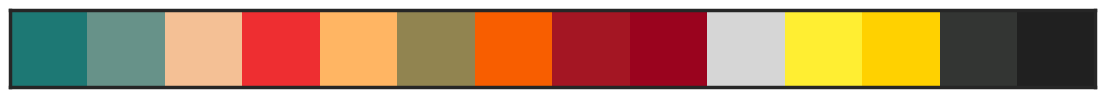

In [14]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

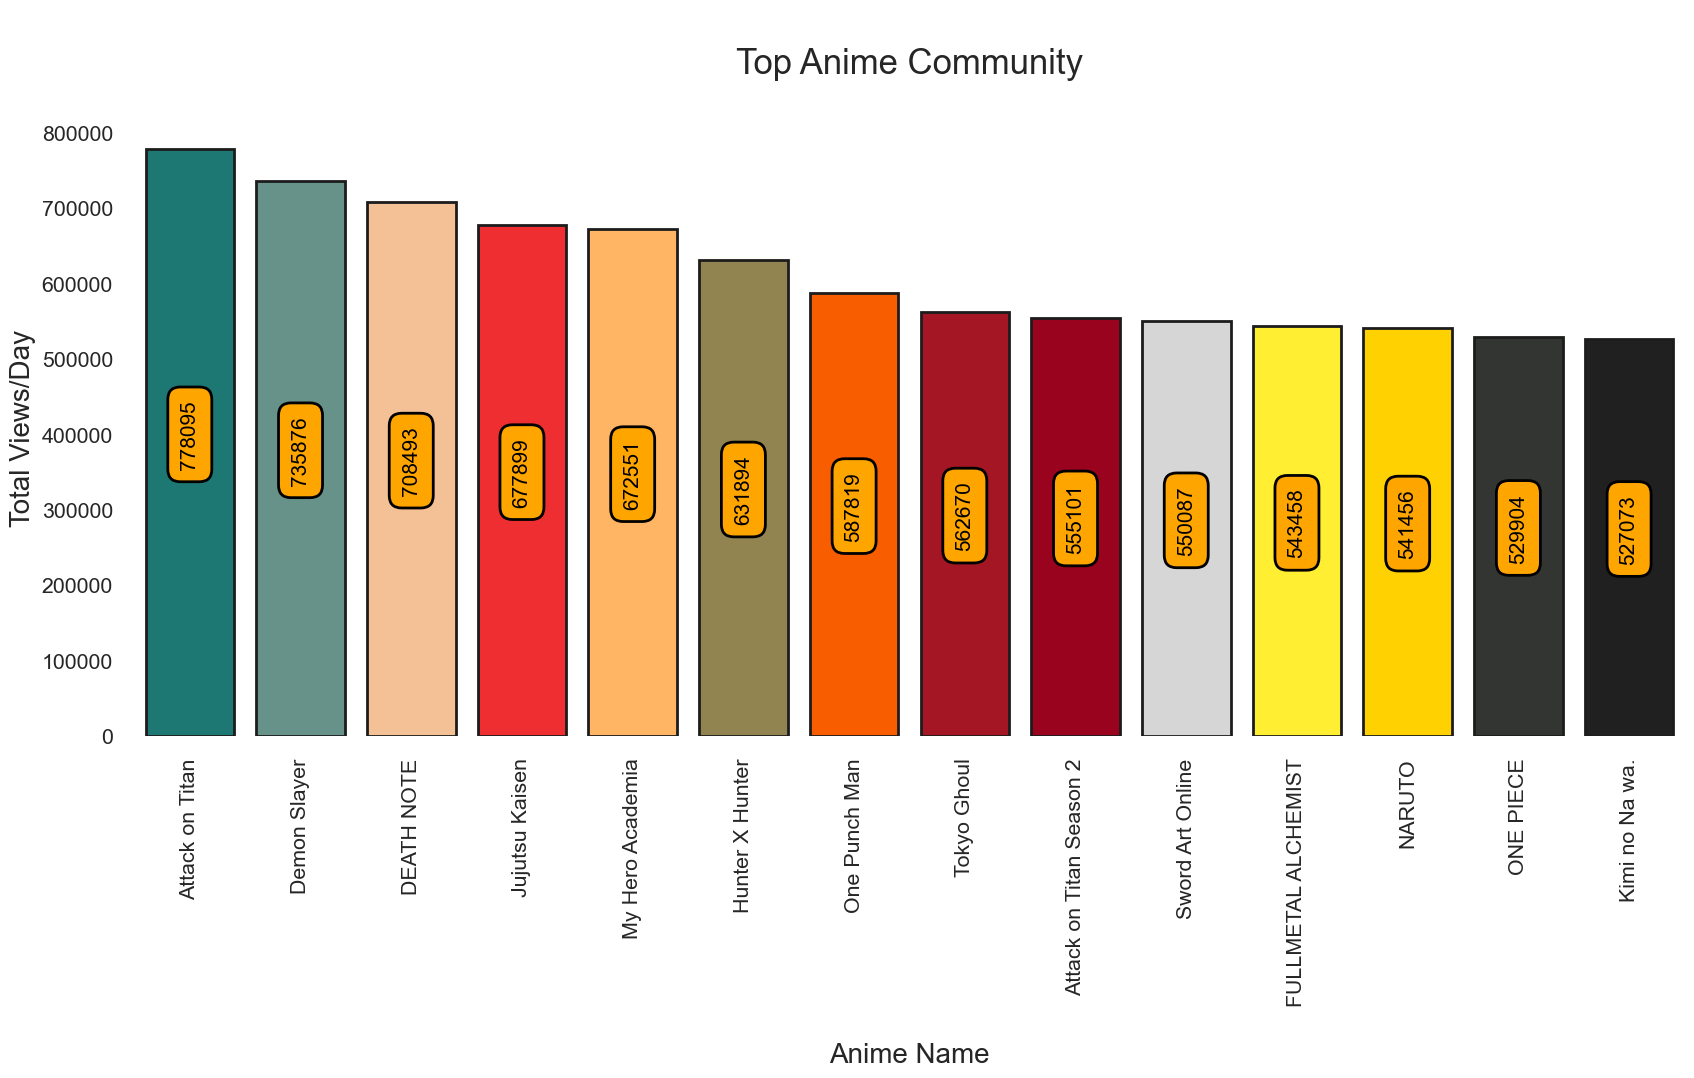

In [15]:
top_anime = data.copy()
top_anime.drop_duplicates(subset ="anime_name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["total_views"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp1["anime_name"][:14],y=top_anime_temp1["total_views"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Views/Day" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [16]:
data['type'].value_counts().to_frame().T

type,TV,MOVIE,OVA,ONA,TV_SHORT,SPECIAL,MUSIC
count,814,105,32,29,11,8,1


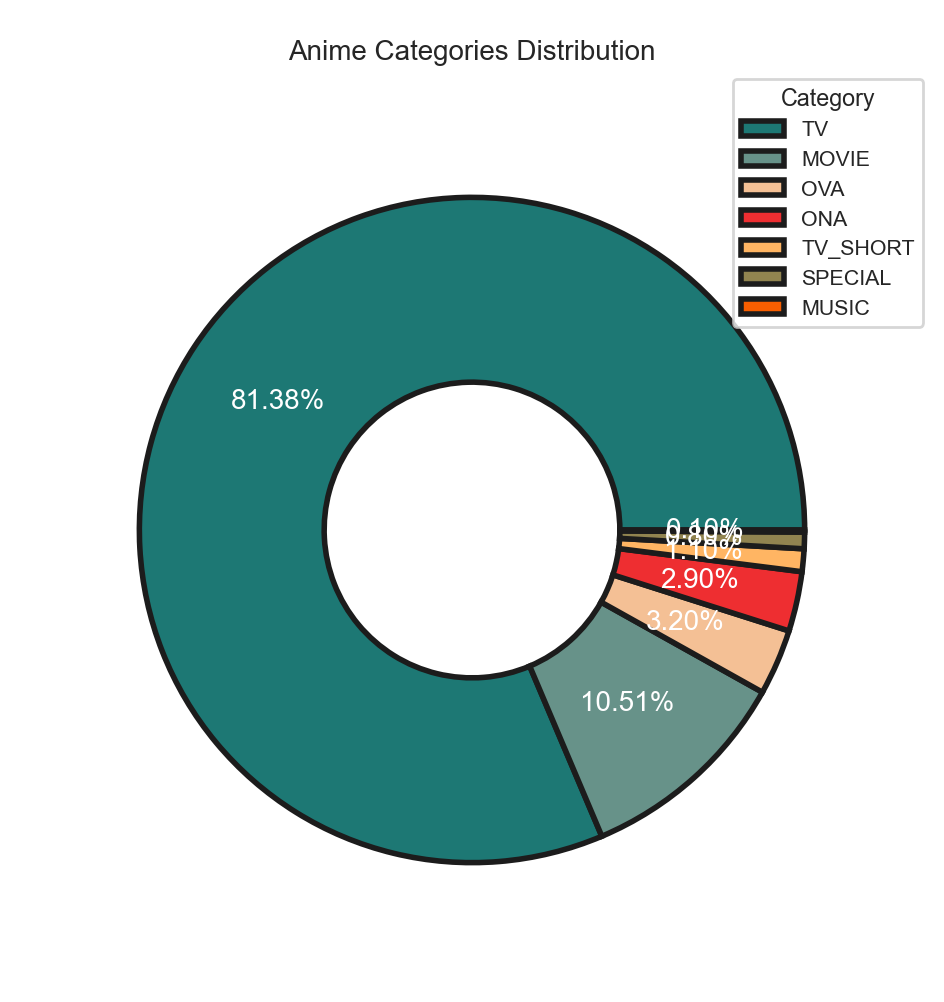

In [17]:
plt.subplots(figsize=(12, 12))

labels = "TV","MOVIE","OVA","ONA","TV_SHORT","SPECIAL","MUSIC"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="MOVIE"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="TV_SHORT"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="SPECIAL"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="MUSIC"]["type"])],
                                    explode = (0,0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc=0)
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

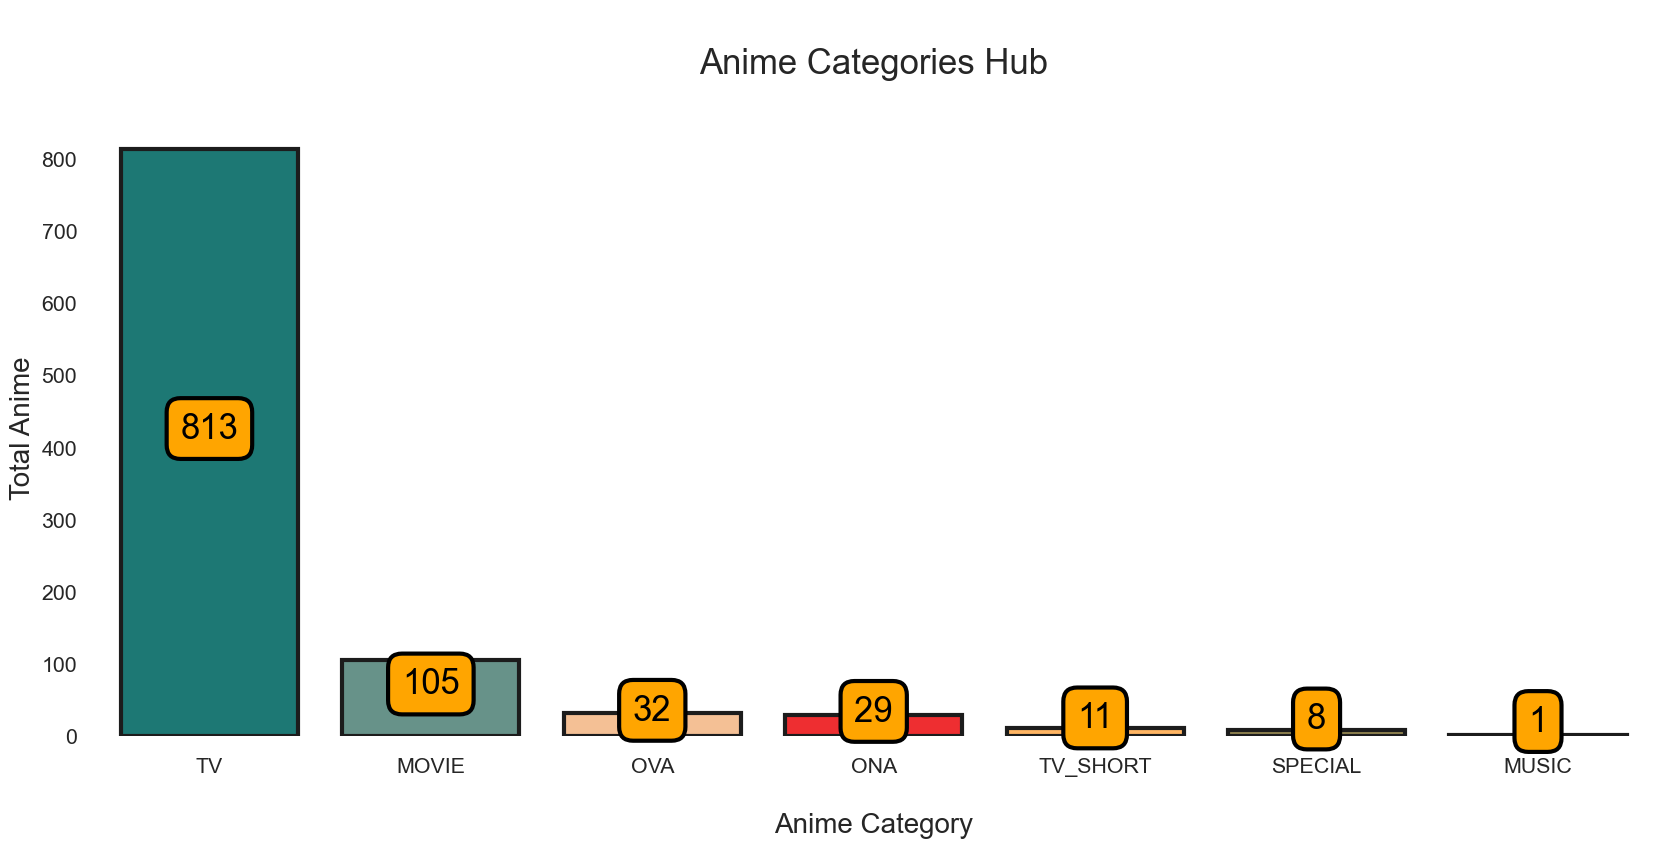

In [18]:
plt.subplots(figsize = (20,8))
p = sns.countplot(x = top_anime_temp1["type"], order = top_anime_temp1["type"].value_counts().index, palette = palette, saturation = 1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nAnime Categories Hub\n" ,fontsize = 25)
plt.ylabel("Total Anime" ,fontsize = 20)
plt.xlabel("\nAnime Category" ,fontsize = 20)
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "black", "linewidth" : 3, "alpha": 1})

sns.despine(left = True, bottom = True)
plt.show()

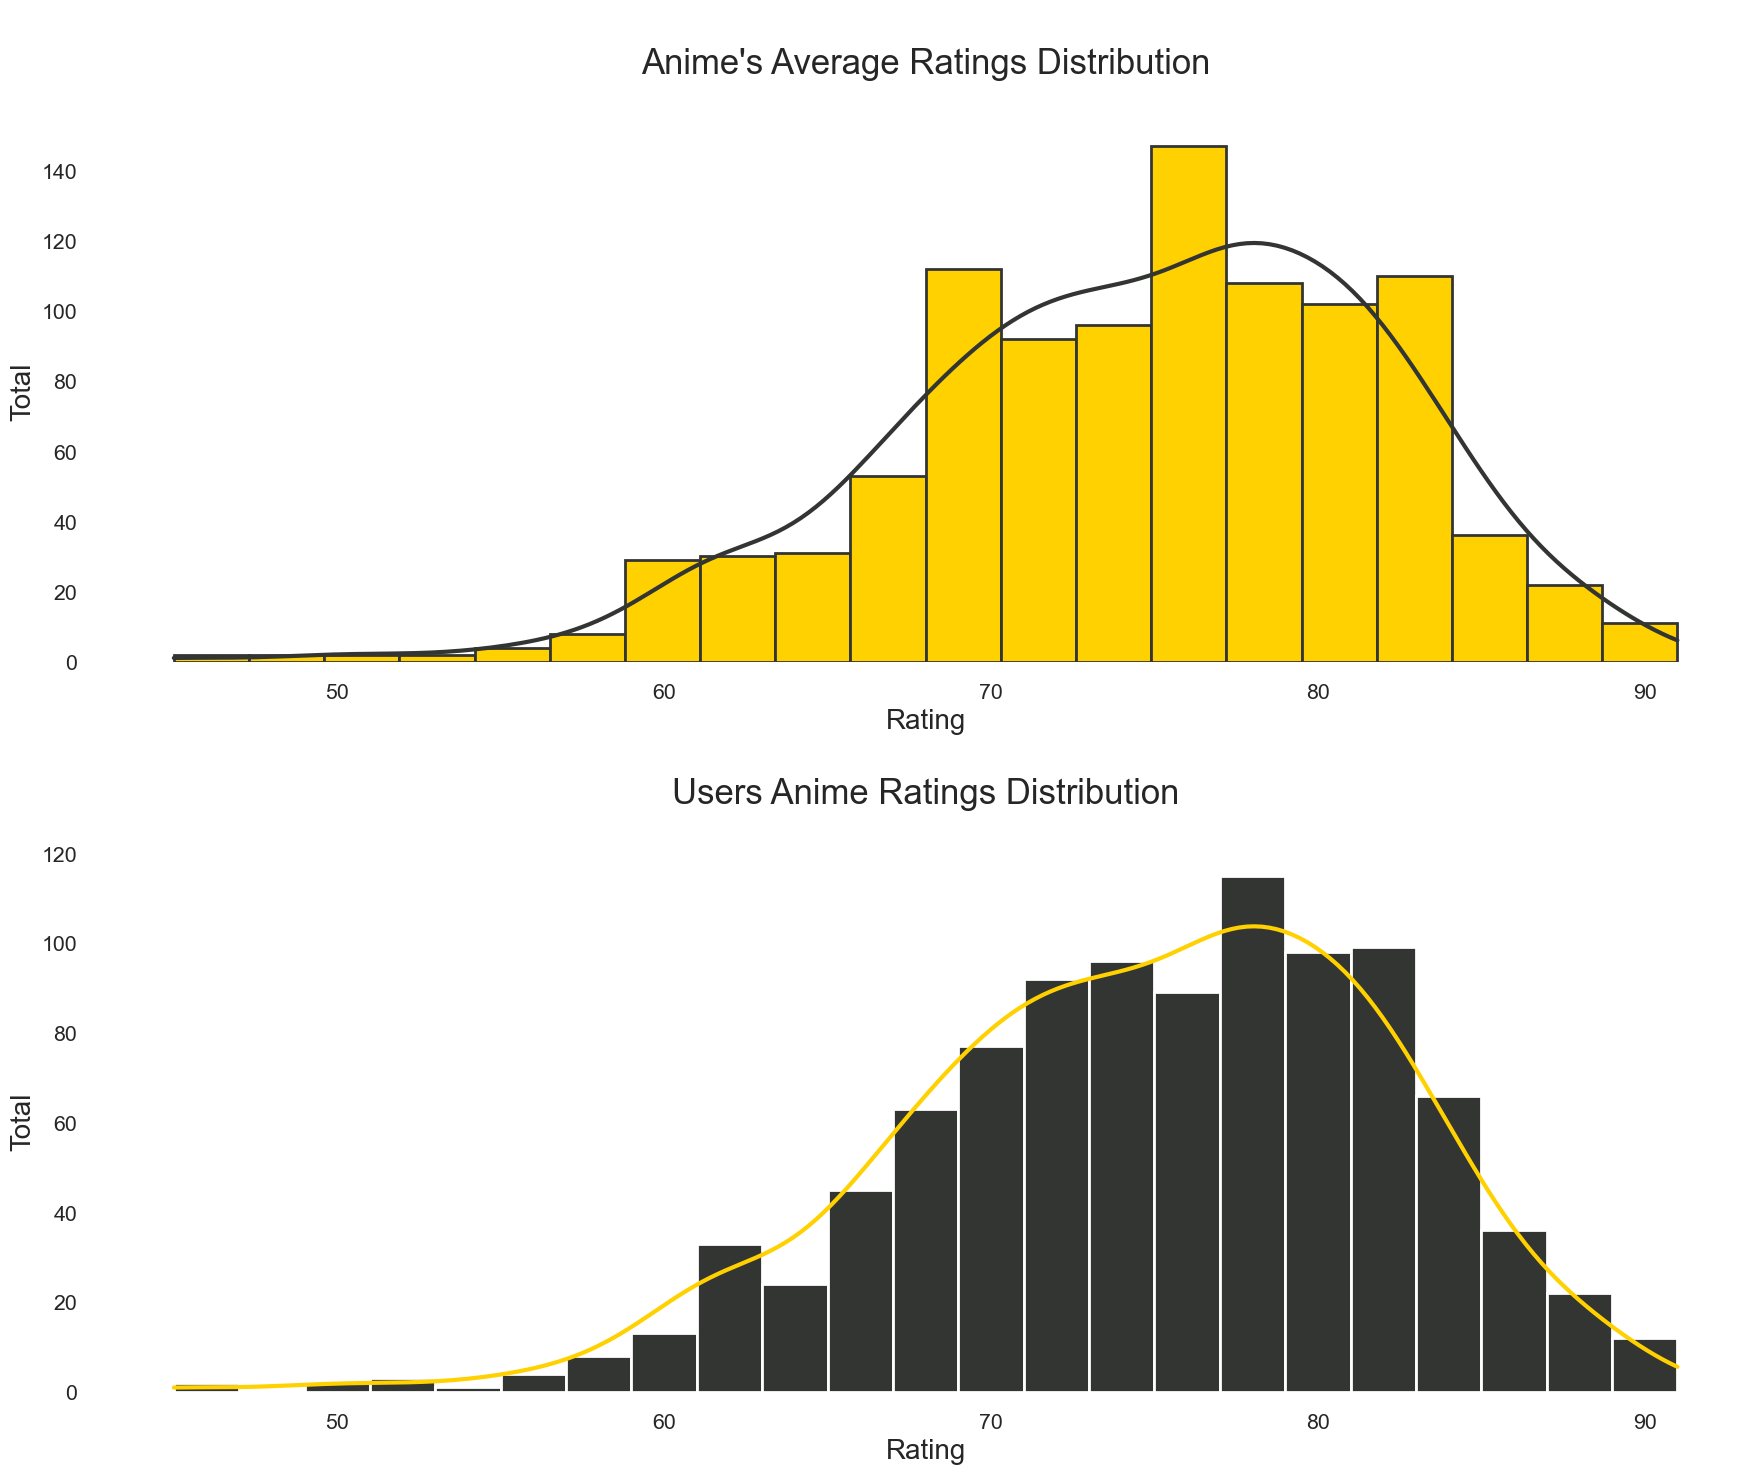

In [19]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(data["rating"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.show()

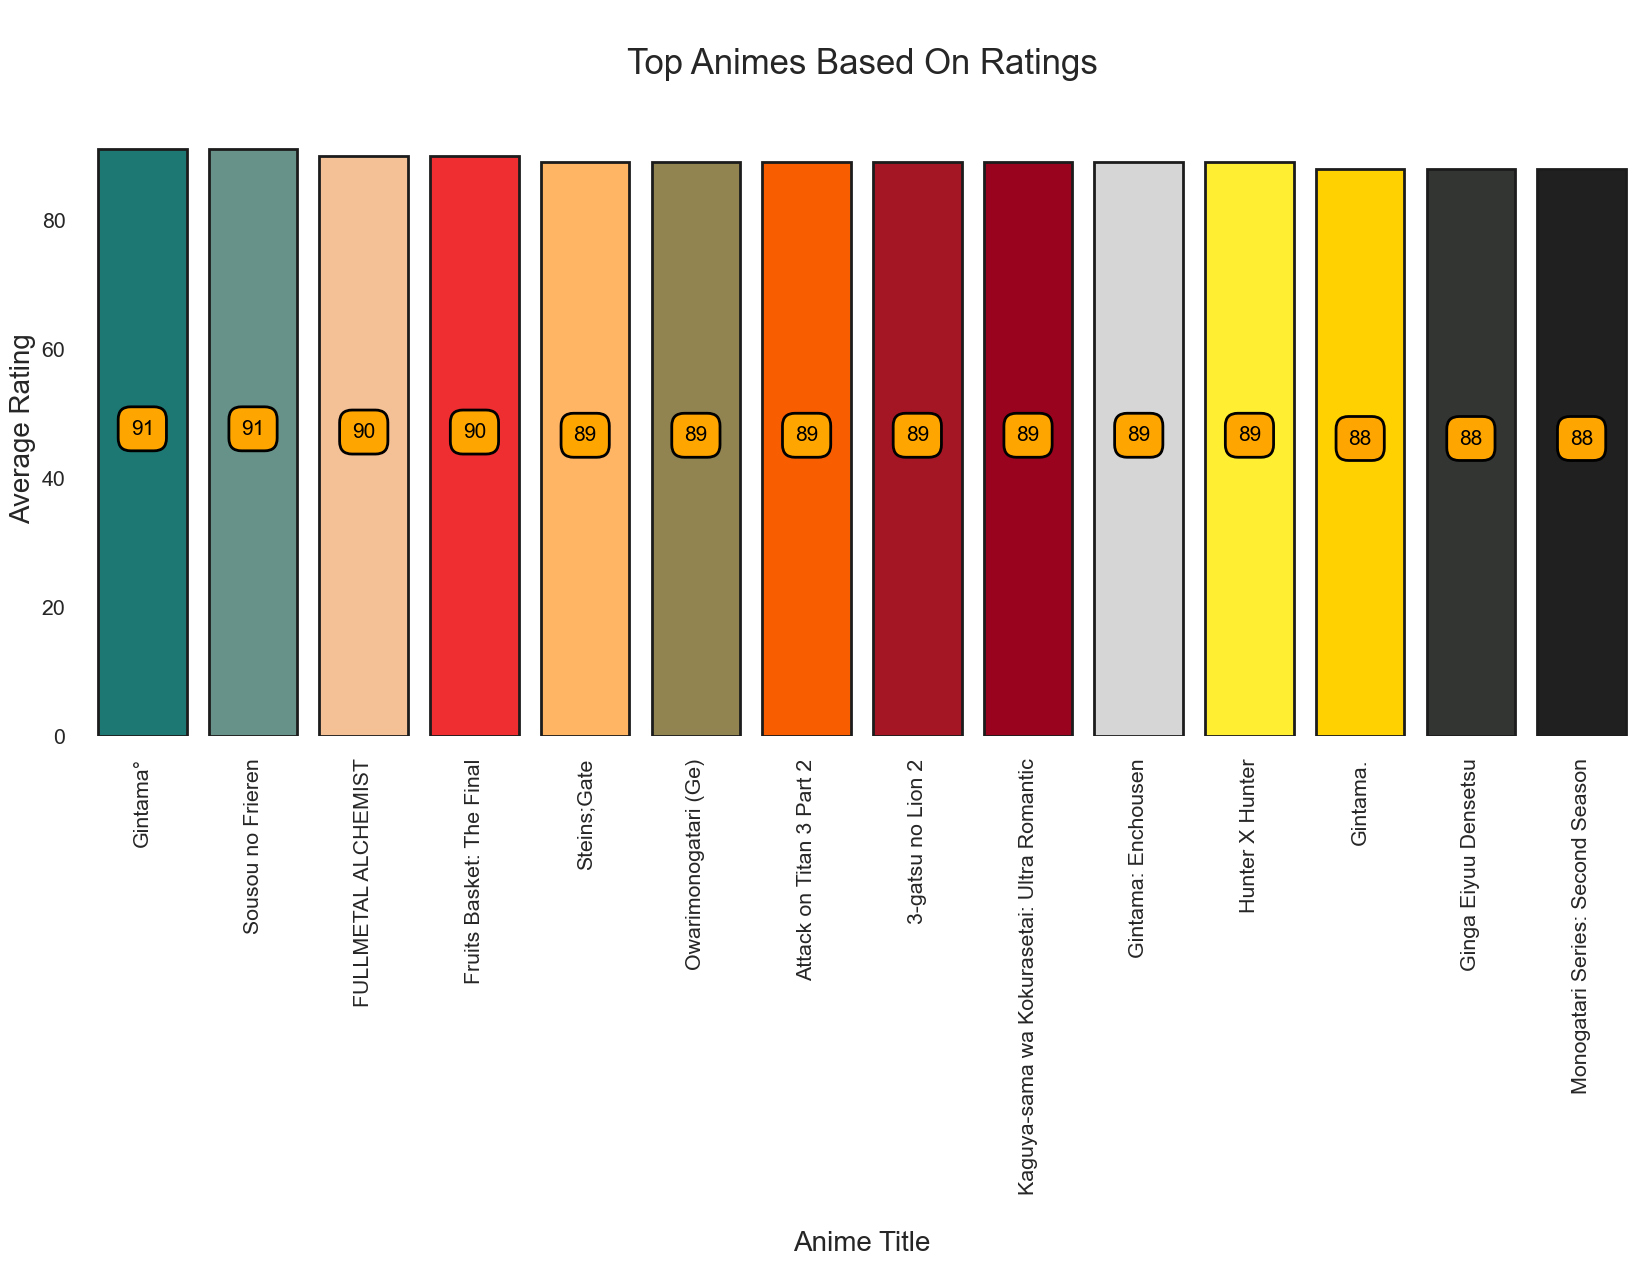

In [20]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp2["anime_name"][:14],y=top_anime_temp2["rating"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 25)
plt.ylabel("Average Rating",fontsize = 20)
plt.xlabel("\nAnime Title",fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [21]:
top_anime_temp3 = top_anime[["genres"]]
top_anime_temp3["genres"] = top_anime_temp3["genres"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genres")
top_anime_temp3["genres"] = top_anime_temp3["genres"].str.title()

print(f'Total unique genres are {len(top_anime_temp3["genres"].unique())}')
print(f'Occurances of unique genres :')
top_anime_temp3["genres"].value_counts().to_frame().T

Total unique genres are 18
Occurances of unique genres :


genres,Action,Comedy,Drama,Romance,Fantasy,Slice Of Life,Supernatural,Adventure,Sci-Fi,Mystery,Psychological,Ecchi,Thriller,Horror,Sports,Mecha,Music,Mahou Shoujo
count,471,469,394,363,359,271,269,263,168,161,149,143,64,58,33,32,27,7


In [37]:
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.sparse import csr_matrix

anime_features = data[['anime_id', 'anime_name', 'genres', 'rating']]
anime_features['rating'].fillna(anime_features['rating'].mean(), inplace=True)

# Convert genres into binary indicators (one-hot encoding)
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(anime_features['genres'].str.split(', ')),
                              columns=mlb.classes_,
                              index=anime_features.index)

anime_features_encoded = pd.concat([anime_features[['anime_id', 'anime_name', 'rating']], genres_encoded], axis=1)
features = anime_features_encoded.drop(['anime_id', 'anime_name'], axis=1)
sparse_features = csr_matrix(features.values)

In [39]:
from sklearn.neighbors import NearestNeighbors
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(sparse_features)

NearestNeighbors(algorithm='brute', metric='cosine')

In [358]:
# Function to recommend anime based on nearest neighbors
def recommend_anime_by_id(anime_id, knn_model, anime_features_encoded, top_n=1):
    anime_index = anime_features_encoded[anime_features_encoded['anime_id'] == anime_id].index[0]
    distances, indices = nn_model.kneighbors(sparse_features[anime_index], n_neighbors=top_n+1)
    distances = distances.squeeze()[1:]
    indices = indices.squeeze()[1:]
    
    recommended_anime_ids = anime_features_encoded.iloc[indices]['anime_id'].tolist()
    recommended_anime_names = anime_features_encoded.iloc[indices]['anime_name'].tolist()
    
    return recommended_anime_ids, recommended_anime_names

random_anime_id = np.random.choice(anime_features_encoded['anime_id'].values)
recommended_ids, recommended_names = recommend_anime_by_id(random_anime_id, nn_model, anime_features_encoded)

print(f"Anime ID: {random_anime_id}")
print("Recommended Anime:")
for anime_id, anime_name in zip(recommended_ids, recommended_names):
    print(f"We will like to recommendation Anime number {anime_id} which is {anime_name}.")
    

Anime ID: 813
Recommended Anime:
We will like to recommendation Anime number 223 which is Dragon Ball.


In [359]:
random_anime_id

813

In [360]:
# Function to recommend sequels or seasons based on a recommended anime ID
def recommend_sequels_by_id(anime_id, anime_features_encoded, anime_data):
    anime_name = anime_features_encoded.loc[anime_features_encoded['anime_id'] == anime_id, 'anime_name'].iloc[0]
    base_anime_name = anime_name.split(':')[0].strip()  # Assuming naming convention like "Attack on Titan : The Final Season"
    related_animes = anime_data[anime_data['anime_name'].str.startswith(base_anime_name)]
    related_animes = related_animes[related_animes['anime_id'] != anime_id]
    return related_animes[['anime_id', 'anime_name']]

recommended_ids, recommended_names = recommend_anime_by_id(random_anime_id, nn_model, anime_features_encoded)

print(f"Random Anime ID: {random_anime_id}")
print("Recommended Anime:")
for anime_id, anime_name in zip(recommended_ids, recommended_names):
    print(f"Anime ID: {anime_id}, Anime Name: {anime_name}")

# Recommend sequels or seasons for the first recommended anime
if recommended_ids:
    sequels = recommend_sequels_by_id(recommended_ids[0], anime_features_encoded, anime_data)
    print("\nRecommended Sequels or Seasons:")
    print(sequels)
else:
    print("\nNo recommended anime to find sequels or seasons for.")


Random Anime ID: 813
Recommended Anime:
Anime ID: 223, Anime Name: Dragon Ball

Recommended Sequels or Seasons:
     anime_id                   anime_name
185       813                Dragon Ball Z
245     21175            Dragon Ball Super
479       225               Dragon Ball GT
546    101302     Dragon Ball Super: Broly
706      6033              Dragon Ball Kai
912     14837  Dragon Ball Z: Kami to Kami


In [361]:
sequels.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,anime_id,anime_name
185,813,Dragon Ball Z
245,21175,Dragon Ball Super
479,225,Dragon Ball GT
546,101302,Dragon Ball Super: Broly
706,6033,Dragon Ball Kai
912,14837,Dragon Ball Z: Kami to Kami


In [324]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = data.copy()
rec_data.drop_duplicates(subset ="anime_name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genres"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

In [330]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
rec_indices = pd.Series(rec_data.index, index = rec_data["anime_name"]).drop_duplicates()

def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title]

    sig_score = list(enumerate(sig[idx]))
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]
     
    rec_dic = {"No" : range(1,11), 
               "Anime Name" : data["anime_name"].iloc[anime_indices].values,
               "Rating" : data["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers :\n")
    
    return dataframe.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

In [333]:
give_recommendation("Darling in the Franxx")

Recommendations for Darling in the Franxx viewers :



,Anime Name,Rating
No,,
1,Guilty Crown,69
2,"Shin Seiki Evangelion Movie: Air / Magokoro wo, Kimi ni",85
3,Evangelion Shin Movie: Jo,77
4,Evangelion Shin Movie: Ha,81
5,Evangelion Shin Movie: Kyuu,75
6,Aharen-san wa Hakarenai,71
7,Mairimashita! Iruma-kun 2,80
8,Shin Seiki Evangelion,83
9,86: Eighty Six,82
